**PROJET CLUSTERING**

**Nicolas THORR**



Pour pouvoir exécuter les commandes, il faut télécharger le jeu de données sous le nom 'communities.data' à partir du site de l'UCI.

On le télécharge dans Colab, à partir de l onglet Fichier, à gauche.

Il n'est pas nécessaire d'exécuter de nouveau les commandes (notamment pour l'entraînement des modèles qui prend du temps). Si on le souhaite tout de même, on clique sur le bouton play à gauche de chaque commande/cellule. Il faut le faire depuis la première commande.

# Importation de la base de données et des bibliothèques

In [0]:
# Afin de réaliser l’apprentissage automatique, j’utilise des bibliothèques dédiées
# et très utilisées sur Python, il s'agit notamment de Pandas.

import pandas as pd

# Pour la visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [0]:
# J'importe la base de données sous le nom "df" ainsi que le nom des colonnes
# Je précise que les valeurs manquantes du fichier sont signalées par un point d'intérogation (?)
df = pd.read_csv('communities.data',header=None,na_values="?")
headers = ['state','county','community','communityname','fold','population','householdsize','racepctblack','racePctWhite','racePctAsian','racePctHisp','agePct12t21','agePct12t29','agePct16t24','agePct65up','numbUrban','pctUrban','medIncome','pctWWage','pctWFarmSelf','pctWInvInc','pctWSocSec','pctWPubAsst','pctWRetire','medFamInc','perCapInc','whitePerCap','blackPerCap','indianPerCap','AsianPerCap','OtherPerCap','HispPerCap','NumUnderPov','PctPopUnderPov','PctLess9thGrade','PctNotHSGrad','PctBSorMore','PctUnemployed','PctEmploy','PctEmplManu','PctEmplProfServ','PctOccupManu','PctOccupMgmtProf','MalePctDivorce','MalePctNevMarr','FemalePctDiv','TotalPctDiv','PersPerFam','PctFam2Par','PctKids2Par','PctYoungKids2Par','PctTeen2Par','PctWorkMomYoungKids','PctWorkMom','NumIlleg','PctIlleg','NumImmig','PctImmigRecent','PctImmigRec5','PctImmigRec8','PctImmigRec10','PctRecentImmig','PctRecImmig5','PctRecImmig8','PctRecImmig10','PctSpeakEnglOnly','PctNotSpeakEnglWell','PctLargHouseFam','PctLargHouseOccup','PersPerOccupHous','PersPerOwnOccHous','PersPerRentOccHous','PctPersOwnOccup','PctPersDenseHous','PctHousLess3BR','MedNumBR','HousVacant','PctHousOccup','PctHousOwnOcc','PctVacantBoarded','PctVacMore6Mos','MedYrHousBuilt','PctHousNoPhone','PctWOFullPlumb','OwnOccLowQuart','OwnOccMedVal','OwnOccHiQuart','RentLowQ','RentMedian','RentHighQ','MedRent','MedRentPctHousInc','MedOwnCostPctInc','MedOwnCostPctIncNoMtg','NumInShelters','NumStreet','PctForeignBorn','PctBornSameState','PctSameHouse85','PctSameCity85','PctSameState85','LemasSwornFT','LemasSwFTPerPop','LemasSwFTFieldOps','LemasSwFTFieldPerPop','LemasTotalReq','LemasTotReqPerPop','PolicReqPerOffic','PolicPerPop','RacialMatchCommPol','PctPolicWhite','PctPolicBlack','PctPolicHisp','PctPolicAsian','PctPolicMinor','OfficAssgnDrugUnits','NumKindsDrugsSeiz','PolicAveOTWorked','LandArea','PopDens','PctUsePubTrans','PolicCars','PolicOperBudg','LemasPctPolicOnPatr','LemasGangUnitDeploy','LemasPctOfficDrugUn','PolicBudgPerPop','ViolentCrimesPerPop']
df.columns = headers
# On obtient les premières lignes de la base.
df.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,...,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,...,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.03,0.13,0.96,0.17,0.06,0.18,0.44,0.13,0.94,0.93,0.03,0.07,0.1,0.07,0.02,0.57,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,...,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,...,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,...,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.0,0.19,0.30,0.73,0.64,0.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,0.67,...,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.0,0.11,0.72,0.64,0.61,0.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [0]:
#Il y a 1994 individus et 128 variables dans le jeu de données

In [0]:
np.shape(df)

(1994, 128)

# Densité et corrélation

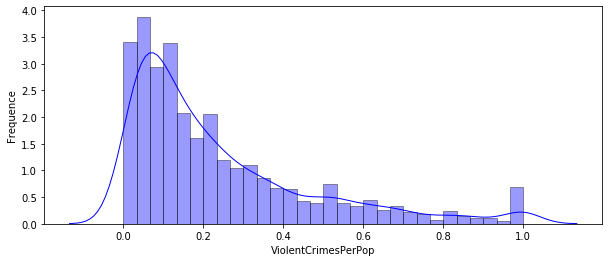

In [0]:
# Observons tout d'abors la distribution de la variable 'ViolentCrimesPerPop' dans le jeu de données
fig = plt.figure(figsize = (10, 4))

ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel("Variable ViolentCrimesPerPop")
ax1.set_ylabel("Frequence") 
sns.distplot(df['ViolentCrimesPerPop'], hist=True, kde=True, 
             bins=int(30), color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})


In [0]:
corr = df.corr()

correlations = abs(corr['ViolentCrimesPerPop'])
var_int = correlations[correlations>0.45]
var_int = var_int.drop(labels=('ViolentCrimesPerPop'))
var_int = var_int.sort_values(ascending=False)
var_int

PctKids2Par           0.738424
PctIlleg              0.737957
PctFam2Par            0.706667
racePctWhite          0.684770
PctYoungKids2Par      0.666059
PctTeen2Par           0.661582
racepctblack          0.631264
pctWInvInc            0.576324
pctWPubAsst           0.574665
FemalePctDiv          0.556032
TotalPctDiv           0.552777
PctPolicBlack         0.543545
PctPersOwnOccup       0.525491
MalePctDivorce        0.525407
PctPopUnderPov        0.521877
PctUnemployed         0.504235
PctHousNoPhone        0.488243
PctPolicMinor         0.486581
PctNotHSGrad          0.483366
PctVacantBoarded      0.482816
PctHousLess3BR        0.474490
NumIlleg              0.471028
PctHousOwnOcc         0.470683
RacialMatchCommPol    0.457834
PctPersDenseHous      0.452901
Name: ViolentCrimesPerPop, dtype: float64

# Pré-traitement de la base de données

In [0]:

# Le site informe que 5 variables sont non prédictives.
# Et cela se comprend bien.
# Par exemple, le nom de la ville n'est pas utile dans notre cas.
# Enlevons les colonnes correspondantes du jeu de données.

In [0]:
df.drop(labels=['state','county','community','communityname','fold'],axis = 'columns',inplace=True)


In [0]:
# Je regarde les variables qui comporte des données manquantes.
# Pour chacune d'entre elle, je précise le nombre de valeurs manquantes.

In [0]:
nulls = df.isnull().sum()
print(nulls[nulls>0])
print()
print('Nombre de variables ayant des NA :', len(nulls[nulls>0]))

OtherPerCap                1
LemasSwornFT            1675
LemasSwFTPerPop         1675
LemasSwFTFieldOps       1675
LemasSwFTFieldPerPop    1675
LemasTotalReq           1675
LemasTotReqPerPop       1675
PolicReqPerOffic        1675
PolicPerPop             1675
RacialMatchCommPol      1675
PctPolicWhite           1675
PctPolicBlack           1675
PctPolicHisp            1675
PctPolicAsian           1675
PctPolicMinor           1675
OfficAssgnDrugUnits     1675
NumKindsDrugsSeiz       1675
PolicAveOTWorked        1675
PolicCars               1675
PolicOperBudg           1675
LemasPctPolicOnPatr     1675
LemasGangUnitDeploy     1675
PolicBudgPerPop         1675
dtype: int64

Nombre de variables ayant des NA : 23


In [0]:
# Rappel : il y a 1994 observations.
# Ainsi, plus de 80 % des donées manquent pour certaines variables.

In [0]:
# On prend la décision de supprimer ces 23 variables qui comportent trop de valeurs manquantes.
# La variable 'OtherPerCap' ne comportant qu'une valeur manquante, on supprime la ligne correspondante.

In [0]:
to_drop = nulls[nulls>0]
df = df.dropna(axis=1,subset=to_drop)
ligne = df[df['OtherPerCap'].isnull() == True]
df = df.drop(ligne.index[0])
df

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,...,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.25,0.52,0.68,0.40,...,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52,0.05,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.00,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,0.42,0.36,1.00,0.63,...,0.10,0.16,0.10,0.17,0.29,0.17,0.26,0.20,0.82,0.0,0.02,0.79,0.24,0.02,0.25,0.65,0.16,0.00,0.21,0.20,0.21,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.00,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.49,0.32,0.63,0.41,...,0.04,0.20,0.20,0.46,0.52,0.43,0.42,0.15,0.51,0.5,0.01,0.86,0.41,0.29,0.30,0.52,0.47,0.45,0.18,0.17,0.16,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.00,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.37,0.39,0.34,0.45,...,0.08,0.56,0.62,0.85,0.77,1.00,0.94,0.12,0.01,0.5,0.01,0.97,0.96,0.60,0.47,0.52,0.11,0.11,0.24,0.21,0.19,0.75,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.00,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,0.67,0.38,0.42,0.46,0.22,0.27,...,0.05,0.16,0.19,0.59,0.60,0.37,0.89,0.02,0.19,0.5,0.01,0.89,0.87,0.04,0.55,0.73,0.05,0.14,0.31,0.31,0.30,0.40,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.00,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,0.03,1.0,0.42,0.74,0.14,0.64,0.30,0.06,0.46,0.41,0.49,0.50,0.27,0.00,0.16,0.36,0.52,0.01,0.16,0.08,0.11,0.65,0.12,0.71,0.17,0.68,0.14,0.70,0.39,0.41,...,0.09,0.09,0.10,0.41,0.43,0.40,0.55,0.10,0.49,0.5,0.02,0.75,0.55,0.00,0.21,0.79,0.07,0.09,0.20,0.22,0.27,0.45,0.39,0.41,0.41,0.50,0.48,0.39,0.00,0.00,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.00,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,0.06,1.0,0.28,0.76,0.10,0.30,0.26,0.37,0.48,0.24,0.18,0.20,0.26,0.18,0.20,0.23,0.26,0.04,0.32,0.33,0.37,0

In [0]:
# On obtient un jeu de données sans valeurs manquantes qui est donc exploitable.
# Il reste maintenant 101 variables, soit 100 variables prédictives.

In [0]:
np.shape(df)

(1993, 101)

# Création d'une forêt aléatoire, entraînement et mesure de performance

In [0]:
# On importe de Scikitlearn les outils utiles pour créer le modèle, l'entraîner et l'évaluer.

In [0]:
# Pour séparer le jeu de données en ensemble d'apprentissage et en ensemble de test
# en mélangeant la bae de données et en retenant une certaine proportion des instances pour chaque ensemble.
from sklearn.model_selection import train_test_split

# Pour mesurer la performance des modèle en utilisant la cross-validation :
from sklearn.model_selection import cross_val_score

# Pour optimiser les paramètres du modèle :
from sklearn.model_selection import GridSearchCV

# Pour créer un modèle de forêt aléatoire :
from sklearn.ensemble import RandomForestRegressor as rfr

In [0]:
# On isole dans y la variable à prédire, qui est 'ViolentCrimesPerPop'
# Ainsi X contiendra les variables prédictives.

In [0]:
y = df['ViolentCrimesPerPop']
X = df.drop(['ViolentCrimesPerPop'],axis=1)

In [0]:
# On importe plusieurs métriques permettant d'évaluer le modèle
# Il s'agit de l'erreur absolue moyenne, la variance et le r^2.

In [0]:
import sklearn
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2


In [0]:
# On divise la base de données en un ensemble de test et un ensemble d'entraînement.

X_train, X_test, y_train, y_test = train_test_split(X,y)


In [0]:
# On précise les paramètres du modèle de forêt aléatoire


model = rfr(n_estimators=600, criterion='mse', max_depth=10, max_features=20, min_samples_split=4,
            max_leaf_nodes=None, bootstrap=True, min_impurity_decrease=0)


Voici la définition des paramètres principaux du modèle :

**n-estimators** : nombre d'arbres à générer

**criterion** : la métrique, mesure de mélange

**max_depth** : profondeur maximale des arbres de régression

**max_features** : nombre de variables à utiliser dans chaque arbre



In [0]:
# On entraîne/fitte le modèle grâce à l'ensemble d'entraînement.

model.fit(X_train,y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features=20, max_leaf_nodes=None,
                      min_impurity_decrease=0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, n_estimators=600,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
# L'entraînement étant fait, nous avons construit une forêt aléatoire.
# On prédit alors la valeur de la variable 'ViolentCrimesPerPop' sur les individus de l'ensemble de test.
# i.e. des individus que le modèle n'a pas vus.

pred = model.predict(X_test)


In [0]:
# On peut maintenant comparer les prédictions aux vraies valeurs
# On utilise plusieurs mesures pour mesurer la performance du modèle.
aerr = mae(pred,y_test)
print('Erreur absolue :' , aerr)

serr = mse(pred,y_test)
print('Erreur quadratique', serr)

rsq = r2(pred,y_test)
print('r^2', rsq)

Erreur absolue : 0.09680552580562857
Erreur quadratique 0.020014779037927474
r^2 0.43349984163563726


In [0]:
# On peut aussi évaluer le modèle par cross-validation.
# Ici pour le R^2 avec 5 folds.
cross_val_score(model,X,y,cv=5, scoring='r2').mean()

# Sélection de variables et perspectives

In [0]:
importance = [model.feature_importances_]
features = [X.columns]
desc_importance = sorted(importance, reverse=True)

100

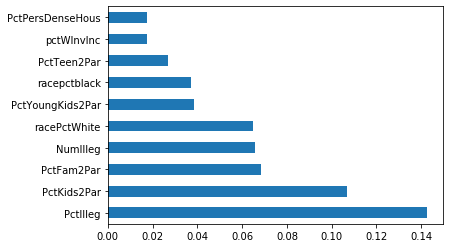

In [0]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [0]:
X_modifie = X[['PctIlleg','PctKids2Par','PctFam2Par','NumIlleg','racePctWhite', 'racepctblack', 'HousVacant', 'PctPersDenseHous']]


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_modifie,y)

model = rfr(n_estimators=600, criterion='mse', max_depth=10, max_features=None, min_samples_split=4,
            max_leaf_nodes=None, bootstrap=True, min_impurity_decrease=0)


model.fit(X_train,y_train)

pred = model.predict(X_test)

aerr = mae(pred,y_test)
print('Erreur absolue :' , aerr)

serr = mse(pred,y_test)
print('Erreur quadratique', serr)

Erreur absolue : 0.10021897240135211
Erreur quadratique 0.022257983125902176


In [0]:
# Au lieu d'imposer les paramètres du modèle, on peut les optimiser avec la fonction GridSearchCV
# On va chercher le nombre d'arbres à construire, le nombre maximal de feuilles à chaque noeud, 
from sklearn.model_selection import GridSearchCV

In [0]:
def rfr_model(X, y):# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=rfr(),
        param_grid={
            'max_depth': range(3,10),
            'n_estimators': (50, 100, 500), 'max_leaf_nodes':(2,3,5,7), 'max_features': (2,3,5,10,15)
        },
        cv=5, scoring='neg_mean_absolute_error', verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(X,y)
    best_params = grid_result.best_params_
    
    # On crée ensuite la forêt avec les meilleurs paramètres.

    rf_r = rfr(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], random_state=False, verbose=False, max_leaf_nodes=best_params['max_leaf_nodes'],
                                                                                                                                                           max_features= best_params['max_features'])# Perform K-Fold CV
    scores = cross_val_score(rf_r, X, y, cv=5, scoring='neg_mean_absolute_error')

    return rf_r, scores

In [0]:
final_model, final_scores = rfr_model(X,y)
final_scores
final_model.fit(X_train,y_train)